In [1]:
import os
import pandas as pd
import json
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import dgl
import seaborn as sns
import math
from sklearn.metrics import r2_score
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None) 

from utils.plot_helpers import *

/Users/nikolaimerkel/development/gnn-paper-plots/virtualenv-example/env/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Section 9 "Sampling" 

In [2]:
experiments = pd.read_csv("logs/sec-4.9.csv")

In [3]:
#print(experiments.count(), 10*2*2*16*8, "gaphs, systes, infras, reorderings, 8 fanout")

In [4]:
cpu_overview = experiments[
    (experiments.system == "pyg") &
    (experiments.infrastructure == "CPU") &
    (experiments.fanout.isin(["25-10", "15-10-5"]))]
gpu_overview = experiments[
    (experiments.system == "pyg") &
    (experiments.infrastructure == "GPU") &
    (experiments.fanout.isin(["25-10","15-10-5"]))]

Figure 12a

['gorder', 'minla', 'slashburn', 'rcm', 'dfs', 'ldg', 'rabbit', 'hubcluster', 'hubsort', 'degsort', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'bfs']
slashburn
minla
gorder
rcm
dfs
bfs
ldg
metis-16
metis-128
metis-1024
metis-8192
metis-65536
rabbit
hubcluster
hubsort
degsort
strategies ['ldg', 'slashburn', 'hubsort', 'degsort', 'hubcluster', 'minla', 'rcm', 'dfs', 'bfs', 'gorder', 'metis-16', 'metis-128', 'rabbit', 'metis-8192', 'metis-1024', 'metis-65536']
ldg
1.025905415631668
slashburn
1.1418593983115057
hubsort
1.1524130613796677
degsort
1.155330356246965
hubcluster
1.2356040398947152
minla
1.2662687868475728
rcm
1.3151217653144918
dfs
1.3173072312700047
bfs
1.3549606546178379
gorder
1.418530585809836
metis-16
1.4568170256428843
metis-128
1.645718664608004
rabbit
1.6828359550151286
metis-8192
1.7643548041817276
metis-1024
1.768472382745522
metis-65536
1.798034418438839


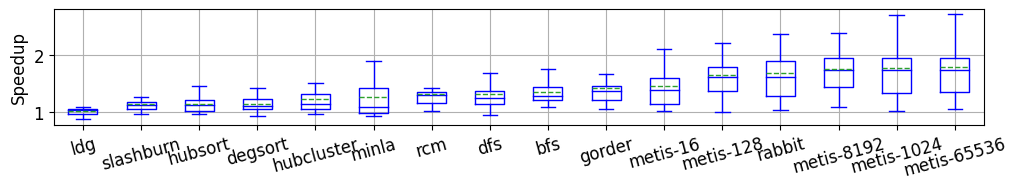

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (12,1.5)
plt.rcParams.update({'font.size': 12})
reordering_strategiess = list(cpu_overview.reordering_strategy.unique())
reordering_strategies = order(reordering_strategiess)
values = []
#print("strategies", reordering_strategies)
for s in reordering_strategies:
    print(s)
    v = cpu_overview[cpu_overview.reordering_strategy.isin([s])]["speedup"].to_numpy().tolist()
    values.append(v)
means = [np.mean(sublist) for sublist in values]
combined = list(zip(means, reordering_strategies))
sorted_combined = sorted(combined, key=lambda x: x[0])
a_sorted, b_sorted = zip(*sorted_combined)
a_sorted = list(a_sorted)
b_sorted = list(b_sorted)
values = []
print("strategies", b_sorted)
for s in b_sorted:
    print(s)
    v = cpu_overview[cpu_overview.reordering_strategy.isin([s])]["speedup"].to_numpy().tolist()
    values.append(v)
    print(np.mean(v))
colors = ['peachpuff', 'orange', 'tomato']
fig, ax = plt.subplots()
ax.set_ylabel('Speedup')
bp = ax.boxplot(values,
                   patch_artist=False,
                   labels=b_sorted,
                   showmeans=True,
                   showfliers=False,
                   meanline=True)

plt.setp(bp['boxes'], c="blue")
plt.setp(bp['whiskers'], c="blue")
plt.setp(bp['caps'], c="blue")
plt.setp(bp['medians'], c="blue")
plt.grid()
plt.xticks(rotation=15)
plt.savefig("figures/overview/overview-mini-batch-cpu.pdf", bbox_inches='tight')

Figure 12b

['gorder', 'minla', 'slashburn', 'rcm', 'dfs', 'ldg', 'rabbit', 'hubcluster', 'hubsort', 'degsort', 'metis-16', 'metis-128', 'metis-1024', 'metis-8192', 'metis-65536', 'bfs']
slashburn
minla
gorder
rcm
dfs
bfs
ldg
metis-16
metis-128
metis-1024
metis-8192
metis-65536
rabbit
hubcluster
hubsort
degsort
strategies ['ldg', 'slashburn', 'hubsort', 'degsort', 'minla', 'hubcluster', 'dfs', 'bfs', 'metis-16', 'rcm', 'gorder', 'metis-128', 'rabbit', 'metis-1024', 'metis-8192', 'metis-65536']
ldg
1.0139754101033576
slashburn
1.1611320250138175
hubsort
1.204392252479726
degsort
1.2098508094379405
minla
1.2665489752309924
hubcluster
1.3199385161330173
dfs
1.3580416253637695
bfs
1.3730839515322404
metis-16
1.3857373966282944
rcm
1.4135141113362009
gorder
1.4490519401193038
metis-128
1.55518145974133
rabbit
1.5851815001938907
metis-1024
1.6453153965403318
metis-8192
1.673768776194081
metis-65536
1.6931943959055544


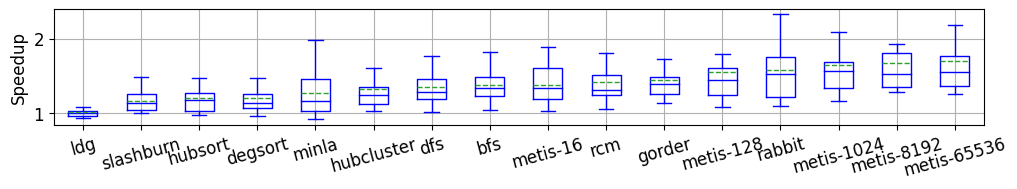

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (12,1.5)
plt.rcParams.update({'font.size': 12})
reordering_strategiess = list(gpu_overview.reordering_strategy.unique())
reordering_strategies = order(reordering_strategiess)

values = []
#print("strategies", reordering_strategies)
for s in reordering_strategies:
    print(s)
    v = gpu_overview[gpu_overview.reordering_strategy.isin([s])]["speedup"].to_numpy().tolist()
    values.append(v)
means = [np.mean(sublist) for sublist in values]
combined = list(zip(means, reordering_strategies))
sorted_combined = sorted(combined, key=lambda x: x[0])
a_sorted, b_sorted = zip(*sorted_combined)
a_sorted = list(a_sorted)
b_sorted = list(b_sorted)

values = []
print("strategies", b_sorted)
for s in b_sorted:
    print(s)
    v = gpu_overview[gpu_overview.reordering_strategy.isin([s])]["speedup"].to_numpy().tolist()
    values.append(v)
    print(np.mean(v))
colors = ['peachpuff', 'orange', 'tomato']
fig, ax = plt.subplots()
ax.set_ylabel('Speedup')
bp = ax.boxplot(values,
                   patch_artist=False,
                   labels=b_sorted,
                   showmeans=True,
                   showfliers=False,
                   meanline=True)

plt.setp(bp['boxes'], c="blue")
plt.setp(bp['whiskers'], c="blue")
plt.setp(bp['caps'], c="blue")
plt.setp(bp['medians'], c="blue")
plt.grid()
plt.xticks(rotation=15)
plt.savefig("figures/overview/overview-mini-batch-gpu.pdf", bbox_inches='tight')

mean and max speedups 

In [7]:
print("CPU - MEAN\n", cpu_overview[cpu_overview.reordering_strategy.isin(["rabbit", "metis-65536"])][["graph_name","infrastructure", "reordering_strategy","speedup"]].groupby(by="reordering_strategy", as_index=False).mean().round(2))
print("GPU - MEAN\n",gpu_overview[gpu_overview.reordering_strategy.isin(["rabbit", "metis-65536"])][["graph_name","infrastructure", "reordering_strategy","speedup"]].groupby(by="reordering_strategy", as_index=False).mean().round(2))

print("CPU - MAX\n", cpu_overview[cpu_overview.reordering_strategy.isin(["rabbit", "metis-65536"])][["graph_name","infrastructure", "reordering_strategy","speedup"]].groupby(by="reordering_strategy", as_index=False)[["reordering_strategy","speedup"]].max().round(2))
print("GPU - MAX\n",gpu_overview[gpu_overview.reordering_strategy.isin(["rabbit", "metis-65536"])][["graph_name","infrastructure", "reordering_strategy","speedup"]].groupby(by="reordering_strategy", as_index=False)[["reordering_strategy","speedup"]].max().round(2))

CPU - MEAN
   reordering_strategy  speedup
0         metis-65536     1.80
1              rabbit     1.68
GPU - MEAN
   reordering_strategy  speedup
0         metis-65536     1.69
1              rabbit     1.59
CPU - MAX
   reordering_strategy  speedup
0         metis-65536     3.82
1              rabbit     3.35
GPU - MAX
   reordering_strategy  speedup
0         metis-65536     3.30
1              rabbit     2.84


/var/folders/kk/7pm_3lhj6dzb_8z55dm9mwzm0000gn/T/ipykernel_77412/678452020.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("CPU - MEAN\n", cpu_overview[cpu_overview.reordering_strategy.isin(["rabbit", "metis-65536"])][["graph_name","infrastructure", "reordering_strategy","speedup"]].groupby(by="reordering_strategy", as_index=False).mean().round(2))
/var/folders/kk/7pm_3lhj6dzb_8z55dm9mwzm0000gn/T/ipykernel_77412/678452020.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("GPU - MEAN\n",gpu_overview[gpu_overview.reordering_strategy.isin(["rabbit", "metis-65536"])][["graph_name","infrastruct

In [8]:
experiments_pase = experiments[
    (experiments.system == "pyg") &
    (experiments.fanout.isin(["high","medium", "low"]))]

In [9]:
#print(experiments_pase.count(), 10*1*2*16*6, "gaphs, systes, infras, reorderings, 6 fanout")

fanout / layer experiments 

In [10]:
experiments_pase.groupby(by=["infrastructure", "num_layers", "fanout"],as_index=False).mean()[["infrastructure", "num_layers", "fanout", "speedup"]].round(2)

/var/folders/kk/7pm_3lhj6dzb_8z55dm9mwzm0000gn/T/ipykernel_77412/1375631235.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  experiments_pase.groupby(by=["infrastructure", "num_layers", "fanout"],as_index=False).mean()[["infrastructure", "num_layers", "fanout", "speedup"]].round(2)


,infrastructure,num_layers,fanout,speedup
0,CPU,2,high,1.26
1,CPU,2,low,1.17
2,CPU,2,medium,1.24
3,CPU,3,high,1.62
4,CPU,3,low,1.38
5,CPU,3,medium,1.53
6,GPU,2,high,1.26
7,GPU,2,low,1.24
8,GPU,2,medium,1.24
9,GPU,3,high,1.62


Figure 13

/var/folders/kk/7pm_3lhj6dzb_8z55dm9mwzm0000gn/T/ipykernel_77412/3267058570.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, d in experiments_pase.groupby(by=["infrastructure"]):


CPU


/var/folders/kk/7pm_3lhj6dzb_8z55dm9mwzm0000gn/T/ipykernel_77412/3267058570.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for ii, dd in d.groupby(by=["num_layers"]):


2
3


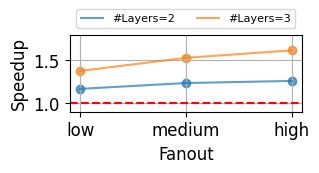

/var/folders/kk/7pm_3lhj6dzb_8z55dm9mwzm0000gn/T/ipykernel_77412/3267058570.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for ii, dd in d.groupby(by=["num_layers"]):


GPU
2
3


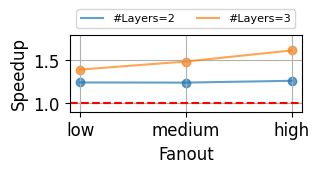

In [11]:

for i, d in experiments_pase.groupby(by=["infrastructure"]):
   print(i)
   plt.figure(figsize=(3, 1))
   # Convert categorical Fanout to numerical values
   fanout_mapping = {'low': 1, 'medium': 2, 'high': 3}
   d['Fanout_num'] = d['fanout'].map(fanout_mapping)
   
   for ii, dd in d.groupby(by=["num_layers"]):
      
      dd = dd[["Fanout_num", "speedup"]].groupby(by=["Fanout_num"],as_index=False).mean()
      print(ii)
      plt.plot(dd['Fanout_num'], dd['speedup'], alpha=0.7, label=f"#Layers={ii}")
      plt.scatter(dd['Fanout_num'], dd['speedup'], alpha=0.7)

      # Set x-ticks to original categorical values
   plt.xticks([1, 2, 3], ['low', 'medium', 'high'])
   plt.xlabel('Fanout')
   plt.ylabel('Speedup')
   plt.ylim(0.9,1.8)
  # plt.title('Scatter Plot of Fanout vs Speedup')
   plt.grid()
   plt.axhline(1, color="r",linestyle='--')
      # Show plot
   plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=2, fontsize=8)
   save_as = f"figures/sampling/fanout-speedup-{i}"
   plt.savefig(f"{save_as}.pdf", bbox_inches='tight')
   plt.show()

In [12]:
experiments_pase[[
        "learning_contributions",
        "data_loading_contributions",
        "system", 
        "infrastructure", 
        "num_layers", 
        "fanout",
        "speedup"]].groupby(by=["system", "infrastructure", "fanout"],as_index=False).mean().round(2)

,system,infrastructure,fanout,learning_contributions,data_loading_contributions,num_layers,speedup
0,pyg,CPU,high,0.39,0.61,2.5,1.44
1,pyg,CPU,low,0.59,0.41,2.5,1.27
2,pyg,CPU,medium,0.45,0.55,2.5,1.38
3,pyg,GPU,high,0.01,0.99,2.5,1.44
4,pyg,GPU,low,0.12,0.88,2.5,1.32
5,pyg,GPU,medium,0.01,0.99,2.5,1.36


In [13]:
experiments[
    (experiments.system == "dgl") &
    (experiments.fanout.isin(["high","medium", "low"]))].groupby(by="infrastructure", as_index=False).mean()[["infrastructure", "speedup"]]


/var/folders/kk/7pm_3lhj6dzb_8z55dm9mwzm0000gn/T/ipykernel_77412/979856355.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  experiments[


,infrastructure,speedup
0,CPU,1.037202
1,GPU,1.017470


amortization - CPU

In [14]:
experiments_amortization = cpu_overview.copy()
experiments_amortization = experiments_amortization[
    (experiments_amortization.epochs_to_amortize > 0) &
    (experiments_amortization.system == "pyg") &
    (experiments_amortization.reordering_strategy == "rabbit")]
experiments_amortization.groupby(by=["infrastructure", "graph_name", "reordering_strategy"], as_index=False).mean()[["infrastructure","graph_name", "reordering_strategy", "epochs_to_amortize"]].sort_values(by=["infrastructure", "epochs_to_amortize"]).round(2)

/var/folders/kk/7pm_3lhj6dzb_8z55dm9mwzm0000gn/T/ipykernel_77412/819379813.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  experiments_amortization.groupby(by=["infrastructure", "graph_name", "reordering_strategy"], as_index=False).mean()[["infrastructure","graph_name", "reordering_strategy", "epochs_to_amortize"]].sort_values(by=["infrastructure", "epochs_to_amortize"]).round(2)


,infrastructure,graph_name,reordering_strategy,epochs_to_amortize
4,CPU,products,rabbit,0.17
1,CPU,livejournal,rabbit,0.20
6,CPU,soc-pokec,rabbit,0.33
9,CPU,wikipedia,rabbit,0.35
2,CPU,orkut,rabbit,0.39
8,CPU,web-BerkStan,rabbit,0.57
0,CPU,dimacs9-USA,rabbit,0.84
5,CPU,reddit,rabbit,1.23
3,CPU,papersgraph,rabbit,3.20
7,CPU,twitter,rabbit,6.10


amortization - GPU

In [15]:
experiments_amortization = gpu_overview.copy()
experiments_amortization = experiments_amortization[
    (experiments_amortization.epochs_to_amortize > 0) &
    (experiments_amortization.system == "pyg") &
    (experiments_amortization.reordering_strategy == "rabbit")]
experiments_amortization.groupby(by=["infrastructure", "graph_name", "reordering_strategy"], as_index=False).mean()[["infrastructure","graph_name", "reordering_strategy", "epochs_to_amortize"]].sort_values(by=["infrastructure", "epochs_to_amortize"]).round(2)

/var/folders/kk/7pm_3lhj6dzb_8z55dm9mwzm0000gn/T/ipykernel_77412/3551101720.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  experiments_amortization.groupby(by=["infrastructure", "graph_name", "reordering_strategy"], as_index=False).mean()[["infrastructure","graph_name", "reordering_strategy", "epochs_to_amortize"]].sort_values(by=["infrastructure", "epochs_to_amortize"]).round(2)


,infrastructure,graph_name,reordering_strategy,epochs_to_amortize
4,GPU,products,rabbit,0.92
0,GPU,dimacs9-USA,rabbit,0.95
1,GPU,livejournal,rabbit,1.21
8,GPU,web-BerkStan,rabbit,1.75
9,GPU,wikipedia,rabbit,1.85
2,GPU,orkut,rabbit,2.20
6,GPU,soc-pokec,rabbit,3.67
7,GPU,twitter,rabbit,4.36
3,GPU,papersgraph,rabbit,6.65
5,GPU,reddit,rabbit,9.87
